In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
#gauss_legendre quadrature set
N=16

quadrature_points, weights = np.polynomial.legendre.leggauss(N)

mu_n = np.array(quadrature_points)
w_n = np.array(weights)

print(mu_n)

[-0.98940093 -0.94457502 -0.8656312  -0.75540441 -0.61787624 -0.45801678
 -0.28160355 -0.09501251  0.09501251  0.28160355  0.45801678  0.61787624
  0.75540441  0.8656312   0.94457502  0.98940093]


In [15]:
#given_data 
h = 0.1
x_j = np.arange(h/2, 15, h)
x_jplushalf = np.arange(0, 15+h, h)

J = len(x_j)
alpha_n = np.zeros(N)
sigma_tj = np.ones(J)
sigma_aj = np.ones(J)*0.1
sigma_s0j = sigma_tj -sigma_aj

In [16]:
def sn_sweep_1d(S_nj):
    
    J=len(x_j)
    flux_0j = np.zeros(J)
    flux_1j = np.zeros(J)
    psi_in = np.zeros(N)
    psi_out = np.zeros(N)
    psi_avg = np.zeros(N)

    for j in range(J):
        for n in range(int(N/2),N):
            psi_out[n] = (1 - (1-alpha_n[n])*sigma_tj[j]*h/(2*mu_n[n])) / (1 + (1+alpha_n[n])*sigma_tj[j]*h/(2*mu_n[n])) * psi_in[n] + (S_nj[n,j]*h / mu_n[n] )/ (1 + (1+alpha_n[n])*sigma_tj[j]*h/(2*mu_n[n] ))
            psi_avg[n] = (1+alpha_n[n])/2 * psi_out[n] + (1-alpha_n[n])/2 * psi_in[n]
            flux_0j[j] = flux_0j[j] + psi_avg[n] * w_n[n]
            flux_1j[j] = flux_1j[j] + psi_avg[n] * mu_n[n] * w_n[n]
            #print(psi_avg)
        psi_in = psi_out.copy()    

    reflection = 0
    
    psi_in[0:int(N/2)] = reflection * psi_in[int(N/2):N]
    #print('left',psi_in)
    for j in reversed(range(J)):
        for n in range(0,int(N/2)):
            psi_out[n] = (1 + (1+alpha_n[n])*sigma_tj[j]*h/(2*mu_n[n])) / (1 - (1-alpha_n[n])*sigma_tj[j]*h/(2*mu_n[n])) * psi_in[n] - (S_nj[n,j]*h / mu_n[n] )/ (1 - (1-alpha_n[n])*sigma_tj[j]*h/(2*mu_n[n] ))
            psi_avg[n] = (1-alpha_n[n])/2 * psi_out[n] + (1+alpha_n[n])/2 * psi_in[n]
            flux_0j[j] = flux_0j[j] + psi_avg[n] * w_n[n]
            flux_1j[j] = flux_1j[j] + psi_avg[n] * mu_n[n] * w_n[n]
    #        print(psi_avg)
        psi_in = psi_out.copy()

    return flux_0j , flux_1j 

1.0
0.4736478568273271
0.29881800564442723
0.21185966822725166
0.16004283418117712
0.12579136930095086
0.10157329702295519
0.08362323445703926
0.06984977559900286
0.058998386876594894
0.05027087811760164
0.04313513302817983
0.03722266523249448
0.03227009507505741
0.028084054592174147
0.024519271680447083
0.021464405788727037
0.018832618752581846
0.016555133973928413
0.014576735750103414
0.012852559964791668
0.01134576348295457
0.010025803376175148
0.008867146983221523
0.007848291322767832
0.006951007957389692
0.00615975443616884
0.005461210399863858
0.004843908102042706
0.004297935246554244
0.003814693805247424
0.003386702607480039
0.0030074344829919353
0.0026711809288629275
0.0023729388903081365
0.0021083154537987208
0.0018734471616472363
0.0016649313491225969
0.0014797674353087544
0.001315306508286277
0.0011692078637717167
0.0010394014060758352
0.0009240550174043178
0.0008215461583060374
0.0007304370875668263
0.0006494531909914524
0.0005774639905458799
0.0005134664722879893
0.0004565

<function matplotlib.pyplot.show(close=None, block=None)>

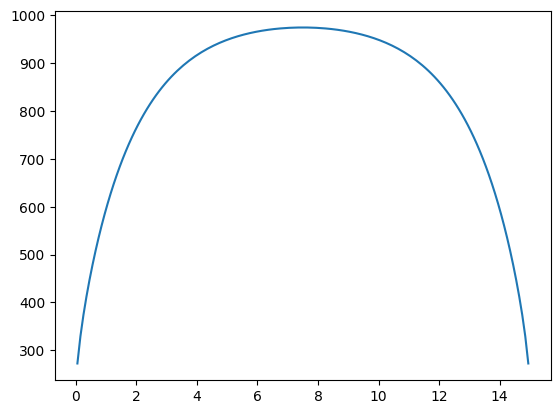

In [17]:
sigma_s1 = 0
flux_0j_old = np.zeros(len(x_j))
flux_1j_old = np.zeros(len(x_j))
flux_0j_new = np.zeros(len(x_j))
flux_1j_new = np.zeros(len(x_j))

S_nj = np.zeros((N,len(x_j)))
Q_j = np.ones(len(x_j))* 100
err = np.inf

t=1
while(err>10**-5):

    for n in range(N):
            S_nj[n,:] = 1/2 * (sigma_s0j * flux_0j_old + Q_j)  + 3/2*mu_n[n]*sigma_s1*flux_1j_old
    
    flux_0j_new, flux_1j_new = sn_sweep_1d(S_nj)
    err = max(abs((flux_0j_old-flux_0j_new)/flux_0j_new))

    flux_0j_old = flux_0j_new.copy()
    print(err)
    t=t+1
plt.plot(x_j,flux_0j_new)

plt.show


In [19]:
t

83